# The Value of Cultural Similarity for Predicting Migration


## Carolina Coimbra Vieira, Sophie Lohmann, Emilio Zagheni

**Variables**  
    *`iso_o, iso_d`*: ISO codes in three characters, refering to the country of origin and destination, respectively. 
    
+ **CEPII Language**  
    *`col`*: common official language (0 or 1); 19 languages considered.    
    *`csl`*: p(two random people understand a common language) >= *`cnl`*.  
    *`cnl`*: p(two random people share a native language).  
    *`lp`*: lexical closeness of native langauges; set to 0 when *`cnl`* is 1 or 0 also set to 0 if there is no dominant native language (e.g. India).  
    *`lp1`*: tree based. 4 possibilities, 2 languages belonging to:  
        0: separate family trees  
        0.25: different branches of same tree (English and French),  
        0.50: the same branch (English and German),  
        0.75: the same sub-branch (German and Dutch)  
    *`lp2`*: lexical similarity of 200 words, continuous scale 0-100 normalized *`lp1`*, *`lp2`* so coefficients are comparable to each other and *`col, prox1, prox2`* are unadjusted versions of *`lp1`* and *`lp2`*?  
    
  
+ **CEPII Distance**  
    *`contig`*: dummy variable indicating whether the two countries are contiguous (share a land border).  
    *`comlang_off, comlang_ethno`*: dummy variable indicating whether the two countries share a common language. There are two common languages dummies, the first one based on the fact that two countries share a common official language, and the other one set to one if a language is spoken by at least 9% of the population in both countries.
    *`dist`*: Geodesic distances from lat/long of most populous cities (simple distance).   
    *`distcap`*: geodesic distance between capital cities (simple distance).    
    *`distw`*: population weighted distance, theta = 1 (weighted distance).   
    *`distwces`*: population weighted distance, theta = -1, which corresponds to the usual coefficient estimated from gravity models of bilateral trade flows (weighted distance).  
    *`shared_hist`*: dummy variable indicating whether the two countries have: *`colony, comcol, curcol, col45, smctry`*     
    
    
+ **CEPII Geographic**   
    `area_o, area_d`: Country’s area in $km^2$.   
     
    
+ **UN Population 2019**   
    `pop_o, pop_d`: Country’s population.    
    
            
+ **World Bank GDP constant 2010 US dollar 2019**   
    `GDP_o, GDP_d`: Country’s GDP in US dollar.    
    
    
+ **Abel, Guy; E. Cohen, Joel (2019) Migrant Flow 2015-2020**   
    `m_flow_` (sd_drop_neg, sd_rev_neg, mig_rate, da_min_open, da_min_closed, da_pb_closed): migrant flow between two countries (o and d). 
    
    
+ **UN Migrant Stock 2019**   
    `m_stock`: migrant stock between two countries (o and d).   
    
    
+ **Facebook Food Cultural Similarity**  
    *`CD_nonsymm, CD_symm`*: cosine similarity between the vectors representing each country by the **top k dishes from origin country** and the **top (almost) w dishes** (top k dishes in all the countries), respectively.  

In [1]:
shhh <- suppressPackageStartupMessages # It's a library, so shhh!

shhh(library(tidyr))
shhh(library(dplyr))
shhh(library(readr))
shhh(library(MASS))
shhh(library(ggeffects))
shhh(library(ggplot2))
shhh(library(splines))
shhh(library(repr))
shhh(library(modelr))
shhh(library(broom))
shhh(library(scatterPlotMatrix))
shhh(library(tidyverse))
shhh(library(GGally))
shhh(library(htmlwidgets))
shhh(library(IRdisplay))
shhh(library(dotwhisker))
shhh(library(loo))
shhh(library(blmeco))


shhh(library("texreg"))
shhh(library(caret))

Warning message:
“replacing previous import ‘lifecycle::last_warnings’ by ‘rlang::last_warnings’ when loading ‘pillar’”Warning message:
“replacing previous import ‘lifecycle::last_warnings’ by ‘rlang::last_warnings’ when loading ‘tibble’”

In [2]:
gmodel_data <- read_csv("data/subset-final-dataset-04-22.csv", col_types = cols())

head(gmodel_data)

destination,origin,iso_d,iso_o,col,csl,cnl,prox1,lp1,prox2,...,m_flow_mig_rate,m_flow_da_min_open,m_flow_da_min_closed,m_flow_da_pb_closed,CS_wvs,CS_foursquare,CS_symm,CS_nonsymm_food_o,CS_nonsymm_food_d,CS_FB_pca
Argentina,Australia,ARG,AUS,0,0.02058416,0.00080000,0.25,1.945866,0.13052547,...,56,16,105,2224,0.2579213,0.1005334,-0.11433611,-0.2553475,0.3185665,0.05466153
Argentina,Brazil,ARG,BRA,0,0.06052872,0.00080000,0.75,5.837599,0.42439765,...,9997,2332,0,10767,0.7688173,0.8402622,0.17691737,0.2172456,0.1077964,0.79585871
Argentina,Chile,ARG,CHL,1,0.98010004,0.85439998,0.00,0.000000,0.00000000,...,43666,13875,53604,84213,-0.9899189,0.9548769,0.39391861,0.4090194,0.4667300,0.98090107
Argentina,France,ARG,FRA,0,0.13392781,0.01039232,0.50,3.891733,0.25450581,...,1672,467,156,3048,0.1697698,0.8741573,-0.06134509,-0.2192713,-0.4108677,0.60105840
Argentina,Great Britain,ARG,GBR,0,0.08325152,0.00000000,0.25,1.945866,0.13052547,...,193,45,126,1559,0.3229716,0.6263188,-0.16915309,-0.3668815,-0.2072795,0.37417246
Argentina,Indonesia,ARG,IDN,0,0.00000000,0.00000000,0.00,0.000000,0.07436915,...,4,1,4,7,0.4656905,-0.8793284,-0.19920772,-0.3175994,-0.6779621,-0.39869160


In [3]:
dim(gmodel_data)

[1] 240  40

**Migration stock/flow** 

In order to calculate `log10()` of my dependent variable, *`m_stock`*, I will add an **offset (`offset=1`)** to all the observations in the *`m_stock`* column.

In [4]:
gmodel_data$m_stock <- gmodel_data$m_stock + 1.0
gmodel_data$m_flow_sd_drop_neg <- gmodel_data$m_flow_sd_drop_neg + 1.0
gmodel_data$m_flow_sd_rev_neg <- gmodel_data$m_flow_sd_rev_neg + 1.0
gmodel_data$m_flow_mig_rate <- gmodel_data$m_flow_mig_rate + 1.0
gmodel_data$m_flow_da_min_open <- gmodel_data$m_flow_da_min_open + 1.0
gmodel_data$m_flow_da_min_closed <- gmodel_data$m_flow_da_min_closed + 1.0
gmodel_data$m_flow_da_pb_closed <- gmodel_data$m_flow_da_pb_closed + 1.0

head(gmodel_data)

destination,origin,iso_d,iso_o,col,csl,cnl,prox1,lp1,prox2,...,m_flow_mig_rate,m_flow_da_min_open,m_flow_da_min_closed,m_flow_da_pb_closed,CS_wvs,CS_foursquare,CS_symm,CS_nonsymm_food_o,CS_nonsymm_food_d,CS_FB_pca
Argentina,Australia,ARG,AUS,0,0.02058416,0.00080000,0.25,1.945866,0.13052547,...,57,17,106,2225,0.2579213,0.1005334,-0.11433611,-0.2553475,0.3185665,0.05466153
Argentina,Brazil,ARG,BRA,0,0.06052872,0.00080000,0.75,5.837599,0.42439765,...,9998,2333,1,10768,0.7688173,0.8402622,0.17691737,0.2172456,0.1077964,0.79585871
Argentina,Chile,ARG,CHL,1,0.98010004,0.85439998,0.00,0.000000,0.00000000,...,43667,13876,53605,84214,-0.9899189,0.9548769,0.39391861,0.4090194,0.4667300,0.98090107
Argentina,France,ARG,FRA,0,0.13392781,0.01039232,0.50,3.891733,0.25450581,...,1673,468,157,3049,0.1697698,0.8741573,-0.06134509,-0.2192713,-0.4108677,0.60105840
Argentina,Great Britain,ARG,GBR,0,0.08325152,0.00000000,0.25,1.945866,0.13052547,...,194,46,127,1560,0.3229716,0.6263188,-0.16915309,-0.3668815,-0.2072795,0.37417246
Argentina,Indonesia,ARG,IDN,0,0.00000000,0.00000000,0.00,0.000000,0.07436915,...,5,2,5,8,0.4656905,-0.8793284,-0.19920772,-0.3175994,-0.6779621,-0.39869160


## Model + Cross validation

In [5]:
# R program to implement
# Leave one out cross validation
 
# defining training control
# as Leave One Out Cross Validation
train_control <- trainControl(method = "LOOCV")
 
# training the model by assigning m_flow_da_pb_closed column
# as target variable and rest other column
# as independent variable
m1 <- train(log10(m_flow_da_pb_closed) ~ log10(pop_o) + log10(area_o) + log10(pop_d) + log10(area_d) + log10(distwces),
               data = gmodel_data,
               method = "lm",
               trControl = train_control)
 
# printing model performance metrics
# along with other details
print(m1)

Linear Regression 

240 samples
  5 predictor

No pre-processing
Resampling: Leave-One-Out Cross-Validation 
Summary of sample sizes: 239, 239, 239, 239, 239, 239, ... 
Resampling results:

  RMSE      Rsquared   MAE     
  1.270363  0.0543643  1.000069

Tuning parameter 'intercept' was held constant at a value of TRUE


In [6]:
train_control <- trainControl(method = "LOOCV")
 
m2 <- train(log10(m_flow_da_pb_closed) ~ log10(pop_o) + log10(area_o) + log10(pop_d) + log10(area_d) + log10(distwces) + log10(GDP_o) + log10(GDP_d),
               data = gmodel_data,
               method = "lm",
               trControl = train_control)

print(m2)

Linear Regression 

240 samples
  7 predictor

No pre-processing
Resampling: Leave-One-Out Cross-Validation 
Summary of sample sizes: 239, 239, 239, 239, 239, 239, ... 
Resampling results:

  RMSE      Rsquared   MAE     
  1.038103  0.3656457  0.786624

Tuning parameter 'intercept' was held constant at a value of TRUE


In [7]:
train_control <- trainControl(method = "LOOCV")
 
m3 <- train(log10(m_flow_da_pb_closed) ~ log10(pop_o) + log10(area_o) + log10(pop_d) + log10(area_d) + log10(distwces) + log10(GDP_o) + log10(GDP_d) + col + lp1 + shared_hist,
               data = gmodel_data,
               method = "lm",
               trControl = train_control)

print(m3)

Linear Regression 

240 samples
 10 predictor

No pre-processing
Resampling: Leave-One-Out Cross-Validation 
Summary of sample sizes: 239, 239, 239, 239, 239, 239, ... 
Resampling results:

  RMSE       Rsquared   MAE      
  0.9316951  0.4902808  0.7112435

Tuning parameter 'intercept' was held constant at a value of TRUE


In [8]:
train_control <- trainControl(method = "LOOCV")
 
m4a <- train(log10(m_flow_da_pb_closed) ~ log10(pop_o) + log10(area_o) + log10(pop_d) + log10(area_d) + log10(distwces) + log10(GDP_o) + log10(GDP_d) + col + lp1 + shared_hist + CS_wvs,
               data = gmodel_data,
               method = "lm",
               trControl = train_control)

print(m4a)

Linear Regression 

240 samples
 11 predictor

No pre-processing
Resampling: Leave-One-Out Cross-Validation 
Summary of sample sizes: 239, 239, 239, 239, 239, 239, ... 
Resampling results:

  RMSE      Rsquared   MAE     
  0.912388  0.5112673  0.693333

Tuning parameter 'intercept' was held constant at a value of TRUE


In [9]:
train_control <- trainControl(method = "LOOCV")
 
m4b <- train(log10(m_flow_da_pb_closed) ~ log10(pop_o) + log10(area_o) + log10(pop_d) + log10(area_d) + log10(distwces) + log10(GDP_o) + log10(GDP_d) + col + lp1 + shared_hist + CS_foursquare,
               data = gmodel_data,
               method = "lm",
               trControl = train_control)

print(m4b)

Linear Regression 

240 samples
 11 predictor

No pre-processing
Resampling: Leave-One-Out Cross-Validation 
Summary of sample sizes: 239, 239, 239, 239, 239, 239, ... 
Resampling results:

  RMSE       Rsquared   MAE      
  0.8749711  0.5500505  0.6722848

Tuning parameter 'intercept' was held constant at a value of TRUE


In [10]:
train_control <- trainControl(method = "LOOCV")
 
m4ab <- train(log10(m_flow_da_pb_closed) ~ log10(pop_o) + log10(area_o) + log10(pop_d) + log10(area_d) + log10(distwces) + log10(GDP_o) + log10(GDP_d) + col + lp1 + shared_hist + CS_wvs + CS_foursquare,
               data = gmodel_data,
               method = "lm",
               trControl = train_control)

print(m4ab)

Linear Regression 

240 samples
 12 predictor

No pre-processing
Resampling: Leave-One-Out Cross-Validation 
Summary of sample sizes: 239, 239, 239, 239, 239, 239, ... 
Resampling results:

  RMSE       Rsquared   MAE      
  0.8296471  0.5953347  0.6232715

Tuning parameter 'intercept' was held constant at a value of TRUE


In [11]:
train_control <- trainControl(method = "LOOCV")
 
m4c <- train(log10(m_flow_da_pb_closed) ~ log10(pop_o) + log10(area_o) + log10(pop_d) + log10(area_d) + log10(distwces) + log10(GDP_o) + log10(GDP_d) + col + lp1 + shared_hist + CS_symm,
               data = gmodel_data,
               method = "lm",
               trControl = train_control)

print(m4c)

Linear Regression 

240 samples
 11 predictor

No pre-processing
Resampling: Leave-One-Out Cross-Validation 
Summary of sample sizes: 239, 239, 239, 239, 239, 239, ... 
Resampling results:

  RMSE       Rsquared   MAE      
  0.9200504  0.5034536  0.6961457

Tuning parameter 'intercept' was held constant at a value of TRUE


In [12]:
train_control <- trainControl(method = "LOOCV")
 
m4ac <- train(log10(m_flow_da_pb_closed) ~ log10(pop_o) + log10(area_o) + log10(pop_d) + log10(area_d) + log10(distwces) + log10(GDP_o) + log10(GDP_d) + col + lp1 + shared_hist + CS_wvs + CS_symm,
               data = gmodel_data,
               method = "lm",
               trControl = train_control)

print(m4ac)

Linear Regression 

240 samples
 12 predictor

No pre-processing
Resampling: Leave-One-Out Cross-Validation 
Summary of sample sizes: 239, 239, 239, 239, 239, 239, ... 
Resampling results:

  RMSE       Rsquared  MAE     
  0.8988728  0.526134  0.680252

Tuning parameter 'intercept' was held constant at a value of TRUE


In [13]:
train_control <- trainControl(method = "LOOCV")
 
m4bc <- train(log10(m_flow_da_pb_closed) ~ log10(pop_o) + log10(area_o) + log10(pop_d) + log10(area_d) + log10(distwces) + log10(GDP_o) + log10(GDP_d) + col + lp1 + shared_hist + CS_foursquare + CS_symm,
               data = gmodel_data,
               method = "lm",
               trControl = train_control)

print(m4bc)

Linear Regression 

240 samples
 12 predictor

No pre-processing
Resampling: Leave-One-Out Cross-Validation 
Summary of sample sizes: 239, 239, 239, 239, 239, 239, ... 
Resampling results:

  RMSE       Rsquared  MAE      
  0.8769505  0.548554  0.6676885

Tuning parameter 'intercept' was held constant at a value of TRUE


In [14]:
train_control <- trainControl(method = "LOOCV")
 
m4abc <- train(log10(m_flow_da_pb_closed) ~ log10(pop_o) + log10(area_o) + log10(pop_d) + log10(area_d) + log10(distwces) + log10(GDP_o) + log10(GDP_d) + col + lp1 + shared_hist + CS_wvs + CS_foursquare + CS_symm,
               data = gmodel_data,
               method = "lm",
               trControl = train_control)

print(m4abc)

Linear Regression 

240 samples
 13 predictor

No pre-processing
Resampling: Leave-One-Out Cross-Validation 
Summary of sample sizes: 239, 239, 239, 239, 239, 239, ... 
Resampling results:

  RMSE       Rsquared   MAE      
  0.8324846  0.5930388  0.6201995

Tuning parameter 'intercept' was held constant at a value of TRUE


In [15]:
train_control <- trainControl(method = "LOOCV")
 
m4d <- train(log10(m_flow_da_pb_closed) ~ log10(pop_o) + log10(area_o) + log10(pop_d) + log10(area_d) + log10(distwces) + log10(GDP_o) + log10(GDP_d) + col + lp1 + shared_hist + CS_nonsymm_food_o + CS_nonsymm_food_d,
               data = gmodel_data,
               method = "lm",
               trControl = train_control)

print(m4d)

Linear Regression 

240 samples
 12 predictor

No pre-processing
Resampling: Leave-One-Out Cross-Validation 
Summary of sample sizes: 239, 239, 239, 239, 239, 239, ... 
Resampling results:

  RMSE       Rsquared   MAE      
  0.8796465  0.5456301  0.6754032

Tuning parameter 'intercept' was held constant at a value of TRUE


In [16]:
train_control <- trainControl(method = "LOOCV")
 
m4ad <- train(log10(m_flow_da_pb_closed) ~ log10(pop_o) + log10(area_o) + log10(pop_d) + log10(area_d) + log10(distwces) + log10(GDP_o) + log10(GDP_d) + col + lp1 + shared_hist + CS_wvs + CS_nonsymm_food_o + CS_nonsymm_food_d,
               data = gmodel_data,
               method = "lm",
               trControl = train_control)

print(m4ad)

Linear Regression 

240 samples
 13 predictor

No pre-processing
Resampling: Leave-One-Out Cross-Validation 
Summary of sample sizes: 239, 239, 239, 239, 239, 239, ... 
Resampling results:

  RMSE       Rsquared   MAE      
  0.8443108  0.5812555  0.6570101

Tuning parameter 'intercept' was held constant at a value of TRUE


In [17]:
train_control <- trainControl(method = "LOOCV")
 
m4bd <- train(log10(m_flow_da_pb_closed) ~ log10(pop_o) + log10(area_o) + log10(pop_d) + log10(area_d) + log10(distwces) + log10(GDP_o) + log10(GDP_d) + col + lp1 + shared_hist + CS_foursquare + CS_nonsymm_food_o + CS_nonsymm_food_d,
               data = gmodel_data,
               method = "lm",
               trControl = train_control)

print(m4bd)

Linear Regression 

240 samples
 13 predictor

No pre-processing
Resampling: Leave-One-Out Cross-Validation 
Summary of sample sizes: 239, 239, 239, 239, 239, 239, ... 
Resampling results:

  RMSE       Rsquared   MAE      
  0.8524622  0.5732017  0.6630314

Tuning parameter 'intercept' was held constant at a value of TRUE


In [18]:
train_control <- trainControl(method = "LOOCV")
 
m4abd <- train(log10(m_flow_da_pb_closed) ~ log10(pop_o) + log10(area_o) + log10(pop_d) + log10(area_d) + log10(distwces) + log10(GDP_o) + log10(GDP_d) + col + lp1 + shared_hist + CS_wvs + CS_foursquare + CS_nonsymm_food_o + CS_nonsymm_food_d,
               data = gmodel_data,
               method = "lm",
               trControl = train_control)

print(m4abd)

Linear Regression 

240 samples
 14 predictor

No pre-processing
Resampling: Leave-One-Out Cross-Validation 
Summary of sample sizes: 239, 239, 239, 239, 239, 239, ... 
Resampling results:

  RMSE       Rsquared   MAE     
  0.7982575  0.6254939  0.612497

Tuning parameter 'intercept' was held constant at a value of TRUE


In [19]:
train_control <- trainControl(method = "LOOCV")
 
m4cd <- train(log10(m_flow_da_pb_closed) ~ log10(pop_o) + log10(area_o) + log10(pop_d) + log10(area_d) + log10(distwces) + log10(GDP_o) + log10(GDP_d) + col + lp1 + shared_hist + CS_symm + CS_nonsymm_food_o + CS_nonsymm_food_d,
               data = gmodel_data,
               method = "lm",
               trControl = train_control)

print(m4cd)

Linear Regression 

240 samples
 13 predictor

No pre-processing
Resampling: Leave-One-Out Cross-Validation 
Summary of sample sizes: 239, 239, 239, 239, 239, 239, ... 
Resampling results:

  RMSE       Rsquared   MAE      
  0.8839778  0.5415788  0.6745043

Tuning parameter 'intercept' was held constant at a value of TRUE


In [20]:
train_control <- trainControl(method = "LOOCV")
 
m5 <- train(log10(m_flow_da_pb_closed) ~ log10(pop_o) + log10(area_o) + log10(pop_d) + log10(area_d) + log10(distwces) + log10(GDP_o) + log10(GDP_d) + col + lp1 + shared_hist + CS_wvs + CS_foursquare + CS_symm + CS_nonsymm_food_o + CS_nonsymm_food_d,
               data = gmodel_data,
               method = "lm",
               trControl = train_control)

print(m5)

Linear Regression 

240 samples
 15 predictor

No pre-processing
Resampling: Leave-One-Out Cross-Validation 
Summary of sample sizes: 239, 239, 239, 239, 239, 239, ... 
Resampling results:

  RMSE       Rsquared   MAE      
  0.8042254  0.6202187  0.6161051

Tuning parameter 'intercept' was held constant at a value of TRUE


In [21]:
train_control <- trainControl(method = "LOOCV")
 
m5aux <- train(log10(m_flow_da_pb_closed) ~ log10(pop_o) + log10(area_o) + log10(pop_d) + log10(area_d) + log10(distwces) + log10(GDP_o) + log10(GDP_d) + col + lp1 + shared_hist + CS_wvs + CS_symm + CS_nonsymm_food_o + CS_nonsymm_food_d,
               data = gmodel_data,
               method = "lm",
               trControl = train_control)

print(m5aux)

Linear Regression 

240 samples
 14 predictor

No pre-processing
Resampling: Leave-One-Out Cross-Validation 
Summary of sample sizes: 239, 239, 239, 239, 239, 239, ... 
Resampling results:

  RMSE       Rsquared   MAE      
  0.8490508  0.5769344  0.6543551

Tuning parameter 'intercept' was held constant at a value of TRUE


## LATEX table
#### The final model from the Cross-validation using the FULL input dataset 

In [22]:
print(texreg(list(m1$finalModel, m2$finalModel, m3$finalModel, m4a$finalModel, m4ab$finalModel, m4abd$finalModel, m4abc$finalModel, m4d$finalModel, m4c$finalModel, m4ad$finalModel, m4ac$finalModel), dcolumn = TRUE, booktabs = TRUE, 
       use.packages = FALSE, label = "tab:models_flow", caption = "Linear models", 
       float.pos = "h"))


\begin{table}[h]
\begin{center}
\begin{tabular}{l D{.}{.}{3.3} D{.}{.}{3.5} D{.}{.}{3.5} D{.}{.}{3.5} D{.}{.}{3.5} D{.}{.}{3.5} D{.}{.}{3.5} D{.}{.}{3.5} D{.}{.}{3.5} D{.}{.}{3.5} D{.}{.}{3.5}}
\toprule
 & \multicolumn{1}{c}{Model 1} & \multicolumn{1}{c}{Model 2} & \multicolumn{1}{c}{Model 3} & \multicolumn{1}{c}{Model 4} & \multicolumn{1}{c}{Model 5} & \multicolumn{1}{c}{Model 6} & \multicolumn{1}{c}{Model 7} & \multicolumn{1}{c}{Model 8} & \multicolumn{1}{c}{Model 9} & \multicolumn{1}{c}{Model 10} & \multicolumn{1}{c}{Model 11} \\
\midrule
(Intercept)          & -5.74^{*} & -25.51^{***} & -25.64^{***} & -26.29^{***} & -25.23^{***} & -25.31^{***} & -24.84^{***} & -25.31^{***} & -24.72^{***} & -26.08^{***} & -25.36^{***} \\
                     & (2.42)    & (2.65)       & (2.38)       & (2.34)       & (2.13)       & (2.04)       & (2.13)       & (2.24)       & (2.36)       & (2.15)       & (2.30)       \\
`log10(pop\_o)`      & 0.33      & -0.96^{***}  & -0.55^{*}    & -0.61^{*}    &

## AIC and BIC

In [23]:
print("Model 1: Baseline")
print(m1$finalModel)
print(summary(m1)$adj.r.squared)
print(AIC(m1$finalModel))
print(BIC(m1$finalModel))
print(blmeco::WAIC(m1$finalModel))

print("Model 2: GDP")
print(m2$finalModel)
print(summary(m2)$adj.r.squared)
print(AIC(m2$finalModel))
print(BIC(m2$finalModel))
print(blmeco::WAIC(m2$finalModel))

print("Model 3: Shared language and history")
print(m3$finalModel)
print(summary(m3)$adj.r.squared)
print(AIC(m3$finalModel))
print(BIC(m3$finalModel))
print(blmeco::WAIC(m3$finalModel))

print("Model 4: WVS")
print(m4a$finalModel)
print(summary(m4a)$adj.r.squared)
print(AIC(m4a$finalModel))
print(BIC(m4a$finalModel))
print(blmeco::WAIC(m4a$finalModel))

print("Model 5: Foursquare")
print(m4ab$finalModel)
print(summary(m4ab)$adj.r.squared)
print(AIC(m4ab$finalModel))
print(BIC(m4ab$finalModel))
print(blmeco::WAIC(m4ab$finalModel))

print("Model 6: Asymmetric CS")
print(m4abd$finalModel)
print(summary(m4abd)$adj.r.squared)
print(AIC(m4abd$finalModel))
print(BIC(m4abd$finalModel))
print(blmeco::WAIC(m4abd$finalModel))

print("Model 7: Symmetric CS")
print(m4abc$finalModel)
print(summary(m4abc)$adj.r.squared)
print(AIC(m4abc$finalModel))
print(BIC(m4abc$finalModel))
print(blmeco::WAIC(m4abc$finalModel))

[1] "Model 1: Baseline"

Call:
lm(formula = .outcome ~ ., data = dat)

Coefficients:
      (Intercept)     `log10(pop_o)`    `log10(area_o)`     `log10(pop_d)`  
         -5.74004            0.32671            0.07367            0.47856  
  `log10(area_d)`  `log10(distwces)`  
          0.15616            0.23579  

[1] 0.07999891
[1] 796.5826
[1] 820.9471
$lppd
[1] -391.3916

$pwaic1
[1] 7.275733

$pwaic2
[1] 7.646771

$WAIC1
[1] 797.3347

$WAIC2
[1] 798.0768

[1] "Model 2: GDP"

Call:
lm(formula = .outcome ~ ., data = dat)

Coefficients:
      (Intercept)     `log10(pop_o)`    `log10(area_o)`     `log10(pop_d)`  
         -25.5127            -0.9624             0.2018            -1.1904  
  `log10(area_d)`  `log10(distwces)`     `log10(GDP_o)`     `log10(GDP_d)`  
           0.3216             0.2524             1.4707             1.9055  

[1] 0.3954991
[1] 697.7293
[1] 729.0551
$lppd
[1] -339.2842

$pwaic1
[1] 9.967353

$pwaic2
[1] 10.65782

$WAIC1
[1] 698.5031

$WAIC2
[1] 699.884


## PLOT correlations

In [24]:
gmodel_data_plot_corr <- gmodel_data %>% mutate(log_m_flow_da_pb_closed = log10(m_flow_da_pb_closed)) %>%
                                        dplyr::select(c("log_m_flow_da_pb_closed", "CS_wvs", "CS_foursquare", "CS_nonsymm_food_o", "CS_nonsymm_food_d", "CS_symm"))
                                        
gmodel_data_plot_corr

log_m_flow_da_pb_closed,CS_wvs,CS_foursquare,CS_nonsymm_food_o,CS_nonsymm_food_d,CS_symm
3.347330,0.257921272,0.1005334,-0.25534750,0.31856652,-0.11433611
4.032135,0.768817307,0.8402622,0.21724563,0.10779643,0.17691737
4.925384,-0.989918894,0.9548769,0.40901942,0.46672998,0.39391861
3.484157,0.169769778,0.8741573,-0.21927129,-0.41086766,-0.06134509
3.193125,0.322971579,0.6263188,-0.36688149,-0.20727953,-0.16915309
0.903090,0.465690503,-0.8793284,-0.31759939,-0.67796209,-0.19920772
3.090258,-0.367292972,-0.9719278,-0.51795720,-0.81593583,-0.22437150
0.301030,-0.620184293,-0.7758780,-0.82887197,-0.26388265,-0.28997372
3.304921,0.965394029,0.8856328,0.30998559,0.34413910,0.27235146
2.440909,-0.896528931,-0.8253073,-0.15649225,-0.69455723,-0.08055443


In [25]:
options(OutDec=".")

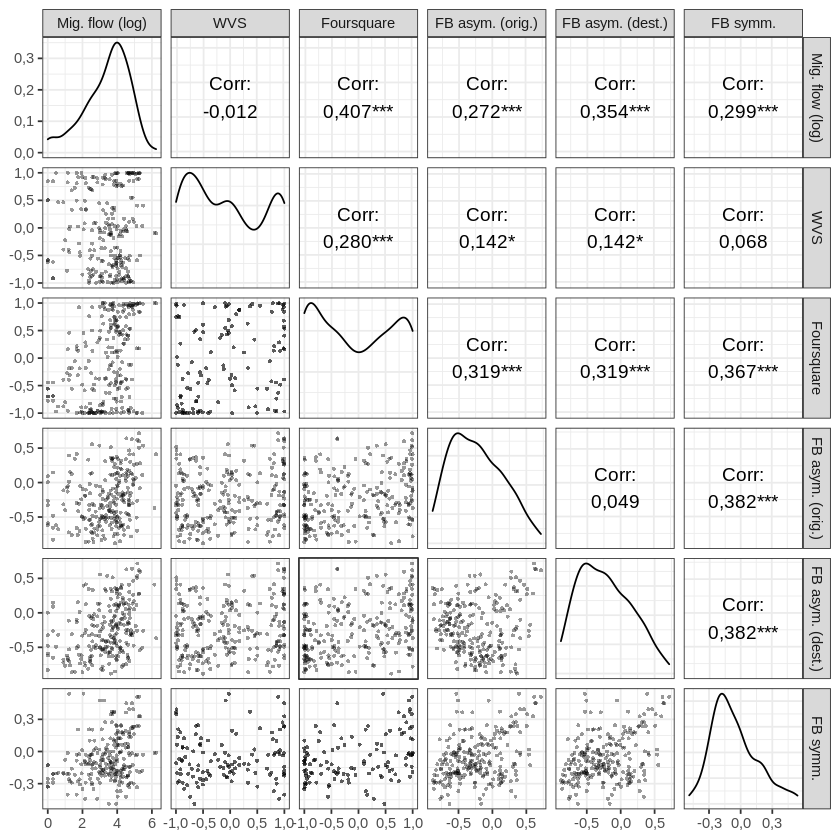

In [26]:
colnames <- c("Mig. flow (log)", "WVS", "Foursquare", "FB asym. (orig.)", "FB asym. (dest.)", "FB symm.")

# Scatter plot matrix with GGally
ggpairs(gmodel_data_plot_corr, 
        columns = c("log_m_flow_da_pb_closed", "CS_wvs", "CS_foursquare", "CS_nonsymm_food_o", "CS_nonsymm_food_d", "CS_symm"),
        columnLabels = colnames,
        upper = list(continuous = wrap('cor', size = 4, col="black")),
        lower = list(continuous = wrap("points", size=0.8, alpha=0.4, pch=16)),
        diag = list(continuous = wrap("densityDiag", alpha = 0.1))) + 

theme(axis.text = element_text(size = 8)) + theme_bw()

ggsave("figs/corr2-top50.png", width = 7, height = 7)

In [27]:
jpeg("figs/corr-top50.jpeg", width = 900, height = 850, res=150, quality=100)

options(repr.plot.width=10, repr.plot.height=5)

# Correlation panel
panel.cor <- function(x, y){
    usr <- par("usr"); on.exit(par(usr))
    par(usr = c(0, 1, 0, 1))
    r <- round(cor(x, y), digits=2)
    txt <- paste0("R = ", r)
    cex.cor <- 0.8/strwidth(txt)
    text(0.5, 0.5, txt, 0.5)
}
# Customize upper panel
upper.panel<-function(x, y){
  points(x, y, lw=1)
}
# Create the plots
pairs(~log10(m_flow_da_pb_closed) + CS_wvs + CS_foursquare + CS_nonsymm_food_o + CS_nonsymm_food_d + CS_symm,
      data=gmodel_data,
      lower.panel = panel.cor,
      upper.panel = upper.panel, 
     cex.labels=0.5)

dev.off()

png 
  2

## PLOT coefficients

Saving 6,67 x 6,67 in image


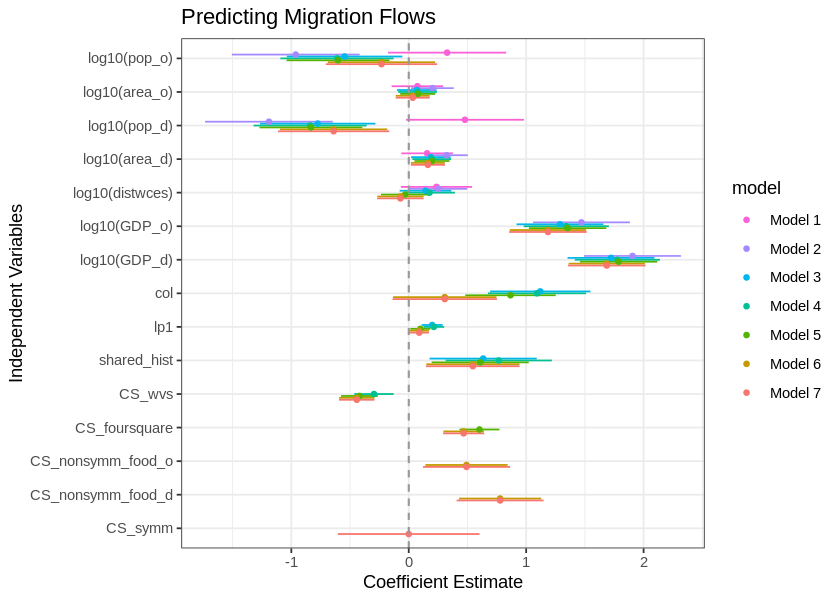

In [28]:
options(repr.plot.width=7, repr.plot.height=5)

dwplot((list(m1$finalModel, m2$finalModel, m3$finalModel, m4a$finalModel, m4ab$finalModel, m4abd$finalModel, m5$finalModel)),
       vline = geom_vline(
           xintercept = 0,
           colour = "grey60",
           linetype = 2
        )) +
# Setting `base_size` for fit the theme
# No need to set `base_size` in most usage
xlab("Coefficient Estimate") + ylab("Independent Variables") +
geom_vline(xintercept = 0,
           colour = "grey60",
           linetype = 2) +
ggtitle("Predicting Migration Flows") +
theme(
        plot.title = element_text(face = "bold"),
        legend.position = c(0.9, 0.2),
        legend.background = element_rect(colour = "grey80"),
        legend.title = element_blank()
    ) + theme_bw()

ggsave("figs/coeffs-top50.png")

## PLOT expected vs. predicted

In [29]:
pm_expected <- log10(gmodel_data$m_flow_da_pb_closed)
pm1 <- predict(m1$finalModel)
pm2 <- predict(m2$finalModel)
pm3 <- predict(m3$finalModel)
pm4a <- predict(m4a$finalModel)
pm4ab <- predict(m4ab$finalModel)
pm4abd <- predict(m4abd$finalModel)
pm5 <- predict(m5$finalModel)

In [30]:
gmodel_data <- gmodel_data %>% mutate (label = paste(iso_o, iso_d, sep="-"))

In [35]:
svg("figs/models-top50.svg", width = 1100, height = 850)
#jpeg("figs/models-top50-flat.jpeg", width = 2200, height = 425, res=150, quality=100)

options(repr.plot.width=10, repr.plot.height=5)

par(mfrow=c(2,3))

color_mpidr = "#ef7d00"

plot(pm_expected, pm1, main="Model 1:\nArea, Population, and Distance", xlim=c(-.5,7), ylim=c(-.5,7), xlab="log expected migration flow", ylab="log predicted migration flow", cex.main=1, col=rgb(red=0, green=0, blue=0, alpha=0.4), pch=19, cex=0.8)
legend(1,1, bty="n", legend=paste("adj-R² =", format(summary(m1)$adj.r.squared, digits=2)))
segments(x0=-.5,y0=-.5,x1=7,y1=7, col = color_mpidr)

plot(pm_expected, pm2, main="Model 2:\n+GDP", xlim=c(-.5,7), ylim=c(-.5,7), xlab="", ylab="", cex.main=1, col=rgb(red=0, green=0, blue=0, alpha=0.4), pch=19, cex=0.8)
legend(1.5,1, bty="n", legend=paste("adj-R² =", format(summary(m2)$adj.r.squared, digits=2)))
segments(x0=-.5,y0=-.5,x1=7,y1=7, col = color_mpidr)

plot(pm_expected, pm3, main="Model 3:\n+Shared language and history", xlim=c(-.5,7), ylim=c(-.5,7), xlab="", ylab="", cex.main=1, col=rgb(red=0, green=0, blue=0, alpha=0.4), pch=19, cex=0.8)
legend(1,1, bty="n", legend=paste("adj-R² =", format(summary(m3)$adj.r.squared, digits=2)))
segments(x0=-.5,y0=-.5,x1=7,y1=7, col = color_mpidr)

#plot.new()
plot(pm_expected, pm4a, main="Model 4:\n+WVS Similarity", xlim=c(-.5,7), ylim=c(-.5,7), xlab="", ylab="", cex.main=1, col=rgb(red=0, green=0, blue=0, alpha=0.4), pch=19, cex=0.8)
legend(1,1, bty="n", legend=paste("adj-R² =", format(summary(m4a)$adj.r.squared, digits=2)))
segments(x0=-.5,y0=-.5,x1=7,y1=7, col = color_mpidr)

plot(pm_expected, pm4ab, main="Model 5:\n+Foursquare Similarity", xlim=c(-.5,7), ylim=c(-.5,7), xlab="", ylab="", cex.main=1, col=rgb(red=0, green=0, blue=0, alpha=0.4), pch=19, cex=0.8)
legend(1,1, bty="n", legend=paste("adj-R² =", format(summary(m4ab)$adj.r.squared, digits=2)))
segments(x0=-.5,y0=-.5,x1=7,y1=7, col = color_mpidr)

plot(pm_expected, pm4abd, main="Model 6:\n+Facebook Asymmetric Similarity", xlim=c(-.5,7), ylim=c(-.5,7), xlab="", ylab="", cex.main=1, col=rgb(red=0, green=0, blue=0, alpha=0.4), pch=19, cex=0.8)
legend(1,1, bty="n", legend=paste("adj-R² =", format(summary(m4abd)$adj.r.squared, digits=2)))
segments(x0=-.5,y0=-.5,x1=7,y1=7, col = color_mpidr)

# plot(log10(gmodel_data$m_flow_da_pb_closed),predict(m5_flow), main="Model 4abcd: WVS, Foursaquare, Symmetric, \n and Asymmetric Cultural Similarity", xlim=c(0,7), ylim=c(0,7), xlab="", ylab="", cex.main=1)
# legend(1,1, bty="n", legend=paste("adj-R² =", format(summary(m5_flow)$adj.r.squared, digits=2)))
# segments(x0=0,y0=0,x1=7,y1=7, col = '#de5e7b')

dev.off()


png 
  2

In [32]:
jpeg("figs/models-text-top50.jpeg", width = 1100, height = 850, res=150, quality=100)

options(repr.plot.width=10, repr.plot.height=5)

par(mfrow=c(2,3))

plot(pm_expected, pm1, main="Model 1: \n Baseline", xlim=c(-.5,7), ylim=c(-.5,7), xlab="log expected migration flow", ylab="log predicted migration flow", cex.main=1, type='n')
legend(1,1, bty="n", legend=paste("adj-R² =", format(summary(m1)$adj.r.squared, digits=2)))
segments(x0=-.5,y0=-.5,x1=7,y1=7, col = '#de5e7b')
text(pm_expected, pm1, gmodel_data$label, cex=0.5)

plot(pm_expected, pm2, main="Model 2: \n GDP", xlim=c(-.5,7), ylim=c(-.5,7), xlab="", ylab="", cex.main=1, type='n')
legend(1.5,1, bty="n", legend=paste("adj-R² =", format(summary(m2)$adj.r.squared, digits=2)))
segments(x0=-.5,y0=-.5,x1=7,y1=7, col = '#de5e7b')
text(pm_expected, pm2, gmodel_data$label, cex=0.5)

plot(pm_expected, pm3, main="Model 3: \n Shared language and history", xlim=c(-.5,7), ylim=c(-.5,7), xlab="", ylab="", cex.main=1, type='n')
legend(1,1, bty="n", legend=paste("adj-R² =", format(summary(m3)$adj.r.squared, digits=2)))
segments(x0=-.5,y0=-.5,x1=7,y1=7, col = '#de5e7b')
text(pm_expected, pm3, gmodel_data$label, cex=0.5)

#plot.new()
plot(pm_expected, pm4a, main="Model 4: \n WVS Similarity", xlim=c(-.5,7), ylim=c(-.5,7), xlab="", ylab="", cex.main=1, type='n')
legend(1,1, bty="n", legend=paste("adj-R² =", format(summary(m4a)$adj.r.squared, digits=2)))
segments(x0=-.5,y0=-.5,x1=7,y1=7, col = '#de5e7b')
text(pm_expected, pm4a, gmodel_data$label, cex=0.5)

plot(pm_expected, pm4ab, main="Model 5: \n Foursquare Similarity", xlim=c(-.5,7), ylim=c(-.5,7), xlab="", ylab="", cex.main=1, type='n')
legend(1,1, bty="n", legend=paste("adj-R² =", format(summary(m4ab)$adj.r.squared, digits=2)))
segments(x0=-.5,y0=-.5,x1=7,y1=7, col = '#de5e7b')
text(pm_expected, pm4ab, gmodel_data$label, cex=0.5)

plot(pm_expected, pm4abd, main="Model 6: \n Facebook Asymmetric Similarity", xlim=c(-.5,7), ylim=c(-.5,7), xlab="", ylab="", cex.main=1, type='n')
legend(1,1, bty="n", legend=paste("adj-R² =", format(summary(m4abd)$adj.r.squared, digits=2)))
segments(x0=-.5,y0=-.5,x1=7,y1=7, col = '#de5e7b')
text(pm_expected, pm4abd, gmodel_data$label, cex=0.5)

# plot(log10(gmodel_data$m_flow_da_pb_closed),predict(m5_flow), main="Model 4abcd: WVS, Foursaquare, Symmetric, \n and Asymmetric Cultural Similarity", xlim=c(0,7), ylim=c(0,7), xlab="", ylab="", cex.main=1)
# legend(1,1, bty="n", legend=paste("adj-R² =", format(summary(m5_flow)$adj.r.squared, digits=2)))
# segments(x0=0,y0=0,x1=7,y1=7, col = '#de5e7b')

dev.off()

png 
  2